# Deep Learning with TensorFlow

In [1]:
import numpy as np
from sklearn. datasets import load_iris
from sklearn. linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]]. values
y = (iris.target == 0) # Iris setosa
per_clf = Perceptron (random_state=42)
per_clf. fit(X, y)
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf. predict(X_new)

In [2]:
from sklearn. linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf. fit (X, y)
assert (sgd_clf. coef_ == per_clf.coef_).all()
assert (sgd_clf. intercept_ == per_clf.intercept_).all()

In [3]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

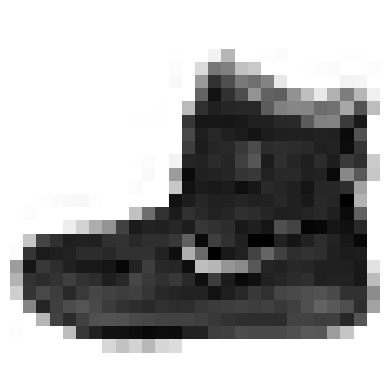

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names [y_train [0]]

'Ankle boot'

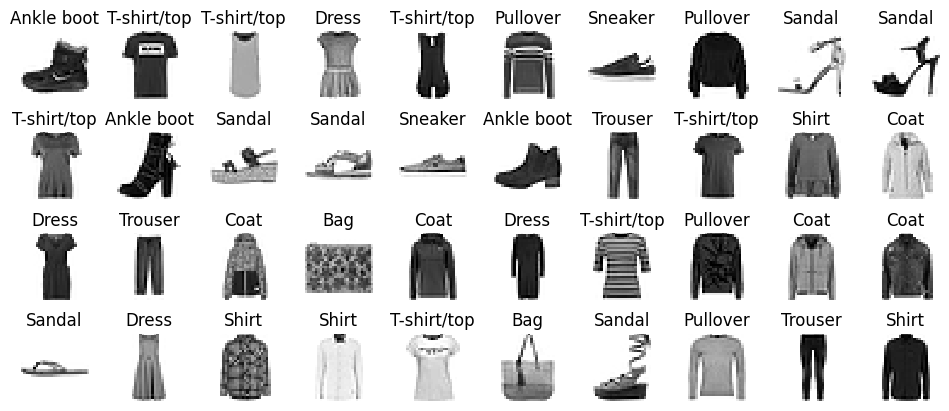

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt. subplot(n_rows, n_cols, index + 1)
      plt. imshow(X_train [index], cmap="binary", interpolation="nearest")
      plt.axis ('off')
      plt. title(class_names [y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
tf. random.set_seed(42)
model = tf.keras.Sequential()
model.add (tf. keras. layers. InputLayer (input_shape= [28, 28]))
model. add (tf.keras.layers.Flatten())
model.add (tf. keras. layers.Dense(300, activation="relu"))
model. add(tf. keras. layers. Dense(100, activation="relu" ))
model.add (tf. keras. layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
tf. keras. backend.clear_session()
tf. random. set_seed (42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape= [28, 28]),
  tf. keras. layers.Dense(300, activation="relu"),
  tf. keras. layers. Dense(100, activation="relu" ),
  tf. keras. layers.Dense(10, activation="softmax"),
])

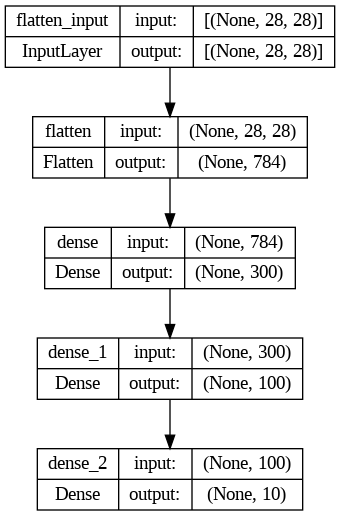

In [13]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [14]:
model.layers

In [15]:
hidden1 = model. layers [1]
hidden1. name

'dense'

In [16]:
model.get_layer( 'dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights ()
weights

array([[-0.03454557, -0.03647981,  0.07292391, ..., -0.05939196,
         0.04204205, -0.03315686],
       [-0.06898399, -0.03201867, -0.02319414, ..., -0.05164282,
         0.02986414, -0.03172094],
       [-0.04771265,  0.02539247, -0.03797062, ...,  0.06605245,
         0.0116013 , -0.04019023],
       ...,
       [ 0.02119172,  0.05392314,  0.00665548, ..., -0.04845469,
        -0.00751171, -0.04912169],
       [-0.00873619,  0.05895345, -0.02552373, ..., -0.0304402 ,
         0.01478711, -0.00824361],
       [ 0.04554739, -0.07417157, -0.04994259, ..., -0.06809817,
         0.03662835,  0.01590706]], dtype=float32)

# Compiling the Model

In [18]:
model. compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd" ,
               metrics=["accuracy"] )

In [19]:
model. compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [20]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],axis=1
    )

array([0, 5, 1, 0])

In [22]:
history = model. fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 31s 16ms/step - loss: 0.7132 - sparse_categorical_accuracy: 0.7660 - val_loss: 0.5051 - val_sparse_categorical_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4889 - sparse_categorical_accuracy: 0.8304 - val_loss: 0.4672 - val_sparse_categorical_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4434 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.4257 - val_sparse_categorical_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4191 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.4054 - val_sparse_categorical_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3986 - sparse_categorical_accuracy: 0.8606 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3820 - sp

In [23]:
history.history

{'loss': [0.7131754159927368,
  0.48888689279556274,
  0.4433553218841553,
  0.41909322142601013,
  0.398645281791687,
  0.3820337653160095,
  0.3696356415748596,
  0.35757216811180115,
  0.3469593822956085,
  0.3365325331687927,
  0.3274630606174469,
  0.3193572461605072,
  0.31167012453079224,
  0.3041926622390747,
  0.29806357622146606,
  0.29092082381248474,
  0.2857729494571686,
  0.27950266003608704,
  0.27433180809020996,
  0.26933372020721436,
  0.2640743553638458,
  0.25919702649116516,
  0.2545827627182007,
  0.24939917027950287,
  0.24533861875534058,
  0.24185845255851746,
  0.23632824420928955,
  0.2333521544933319,
  0.2295406311750412,
  0.22552450001239777],
 'sparse_categorical_accuracy': [0.765999972820282,
  0.8304363489151001,
  0.8446000218391418,
  0.8539272546768188,
  0.8605636358261108,
  0.8657272458076477,
  0.8690545558929443,
  0.8736545443534851,
  0.8770545721054077,
  0.8798909187316895,
  0.8836908936500549,
  0.8858727216720581,
  0.8906545639038086,
 

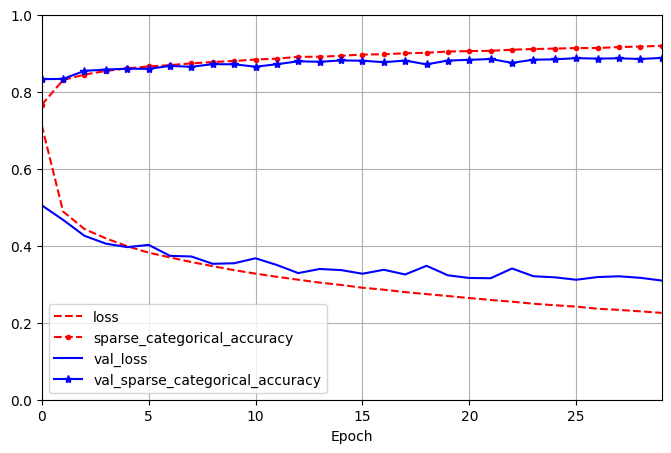

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

pd. DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0,1],grid=True, xlabel="Epoch",
    style=["r--", "r--.","b-","b-*"])

plt. legend (loc="lower left")
plt. show()

In [25]:
model. evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3226 - sparse_categorical_accuracy: 0.8885


[0.3226352035999298, 0.8884999752044678]

In [26]:
X_new = X_test [: 3]
y_proba = model. predict (X_new)
y_proba. round (2)

1/1 [==============================] - 0s 132ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [28]:
np.array (class_names) [y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

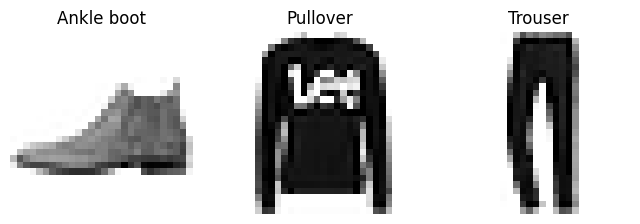

In [29]:
plt.figure(figsize=(8, 3))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis('off')
  plt.title(class_names[y_pred[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [30]:
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv

--2024-07-03 14:58:48--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2024-07-03 14:58:48 (20.2 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [32]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model. fit(X_train, y_train, epochs=20,
                     validation_data=(X_valid, y_valid))

mse_test, rmse_test = model. evaluate(X_test, y_test)
X_new = X_test [:3]
y_pred = model. predict (X_new)

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.8840 - root_mean_squared_error: 0.9402 - val_loss: 0.5596 - val_root_mean_squared_error: 0.7481
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3823 - root_mean_squared_error: 0.6183 - val_loss: 1.2203 - val_root_mean_squared_error: 1.1047
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3690 - root_mean_squared_error: 0.6075 - val_loss: 0.3405 - val_root_mean_squared_error: 0.5835
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3431 - root_mean_squared_error: 0.5858 - val_loss: 0.6627 - val_root_mean_squared_error: 0.8140
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3346 - root_mean_squared_error: 0.5785 - val_loss: 1.0693 - val_root_mean_squared_error: 1.0341
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3318 - root_mean_squared_error: 0.5760 - val_loss: 0.6719 - val_

In [33]:
rmse_test

0.5288052558898926

In [34]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ])

In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [36]:
normalization_layer=tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30,activation="relu")
hidden_layer2=tf.keras.layers.Dense(30,activation="relu")
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalization_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden1,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])

In [37]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

mse_test=model.evaluate(X_test,y_test)
y_pred=model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 27.8547 - root_mean_squared_error: 5.2778 - val_loss: 5.4738 - val_root_mean_squared_error: 2.3396
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6646 - root_mean_squared_error: 1.2902 - val_loss: 4.7650 - val_root_mean_squared_error: 2.1829
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 4.3241 - root_mean_squared_error: 2.0795 - val_loss: 2.4751 - val_root_mean_squared_error: 1.5733
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 2.8445 - root_mean_squared_error: 1.6866 - val_loss: 1.9428 - val_root_mean_squared_error: 1.3938
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 9.3636 - root_mean_squared_error: 3.0600 - val_loss: 7.1036 - val_root_mean_squared_error: 2.6653
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 8.7630 - root_mean_squared_error: 2.9602 - val_loss: 4.8586 - val

In [38]:
mse_test

[0.7239075899124146, 0.8508275747299194]

In [39]:
y_pred

array([[1.1868888],
       [1.8126303],
       [2.381477 ]], dtype=float32)

In [40]:
input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])

norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()

norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)

hidden1=tf.keras.layers.Dense(30,activation="relu")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu")(hidden1)

concat=tf.keras.layers.concatenate([norm_wide,norm_deep])

output=tf.keras.layers.Dense(1)(concat)

model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

In [41]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit([X_train_wide,X_train_deep],y_train,epochs=20,validation_data=([X_valid_wide,X_valid_deep],y_valid))

mse_test=model.evaluate((X_test_wide,X_test_deep),y_test)

y_pred=model.predict([X_new_wide,X_new_deep])

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 7.2010 - root_mean_squared_error: 2.6835 - val_loss: 10.3878 - val_root_mean_squared_error: 3.2230
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 4.7754 - root_mean_squared_error: 2.1853 - val_loss: 7.5317 - val_root_mean_squared_error: 2.7444
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 3.1843 - root_mean_squared_error: 1.7845 - val_loss: 5.2558 - val_root_mean_squared_error: 2.2926
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1250 - root_mean_squared_error: 1.4577 - val_loss: 3.5074 - val_root_mean_squared_error: 1.8728
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4554 - root_mean_squared_error: 1.2064 - val_loss: 2.2403 - val_root_mean_squared_error: 1.4968
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0490 - root_mean_squared_error: 1.0242 - val_loss: 1.4227 - val

In [42]:


input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation="relu")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu")(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2])
output=tf.keras.layers.Dense(1)(concat)
aux_output=tf.keras.layers.Dense(1)(hidden2)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output,aux_output])

In [43]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse","mse"),loss_weights=(0.9,0.1),optimizer=optimizer,metrics=["RootMeanSquaredError"])

In [44]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit([X_train_wide,X_train_deep],[y_train,y_train],epochs=20,
                  validation_data=([X_valid_wide,X_valid_deep],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8993 - dense_8_loss: 1.8023 - dense_9_loss: 2.7722 - dense_8_root_mean_squared_error: 1.3425 - dense_9_root_mean_squared_error: 1.6650 - val_loss: 2.1138 - val_dense_8_loss: 1.1562 - val_dense_9_loss: 10.7324 - val_dense_8_root_mean_squared_error: 1.0753 - val_dense_9_root_mean_squared_error: 3.2760
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6379 - dense_8_loss: 0.6162 - dense_9_loss: 0.8331 - dense_8_root_mean_squared_error: 0.7850 - dense_9_root_mean_squared_error: 0.9127 - val_loss: 3.2098 - val_dense_8_loss: 2.8850 - val_dense_9_loss: 6.1331 - val_dense_8_root_mean_squared_error: 1.6985 - val_dense_9_root_mean_squared_error: 2.4765
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5439 - dense_8_loss: 0.5313 - dense_9_loss: 0.6573 - dense_8_root_mean_squared_error: 0.7289 - dense_9_root_mean_squared_error: 0.8107 - val_loss: 1.1079 - val_dense_8_los

In [45]:
eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses,main_loss,aux_loss,main_rmse,aux_rmse=eval_results

162/162 [==============================] - 0s 2ms/step - loss: 0.3359 - dense_8_loss: 0.3295 - dense_9_loss: 0.3938 - dense_8_root_mean_squared_error: 0.5740 - dense_9_root_mean_squared_error: 0.6276


In [46]:
eval_results

[0.3359142541885376,
 0.3294775187969208,
 0.3938455283641815,
 0.5740013122558594,
 0.6275711059570312]

# Using Subclasing API to build Dynamic Models

In [47]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [48]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [49]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide=tf.keras.layers.Normalization()
    self.norm_layer_deep=tf.keras.layers.Normalization()
    self.hidden1=tf.keras.layers.Dense(units,activation=activation)
    self.hidden2=tf.keras.layers.Dense(units,activation=activation)
    self.main_output=tf.keras.layers.Dense(1)
    self.aux_output=tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide,input_deep=inputs
    norm_wide=self.norm_layer_wide(input_wide)
    norm_deep=self.norm_layer_deep(input_deep)
    hidden1=self.hidden1(norm_deep)
    hidden2=self.hidden2(hidden1)
    concat=tf.keras.layers.concatenate([norm_wide,hidden2])
    output=self.main_output(concat)
    aux_output=self.aux_output(hidden2)
    return output,aux_output

tf.random.set_seed(42)
model= WideAndDeepModel(30,activation='relu',name='my_cool_model')

In [50]:
X_train_wide.shape, X_train_deep.shape

((11610, 5), (11610, 6))

In [51]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",loss_weights=(0.9,0.1),optimizer=optimizer,metrics=["RootMeanSquaredError"])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
                  validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))


eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses,main_loss,aux_loss,main_rmse,aux_rmse=eval_results
y_pred=model.predict((X_new_wide,X_new_deep))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 1.5358 - output_1_loss: 1.4845 - output_2_loss: 1.9973 - output_1_root_mean_squared_error: 1.2184 - output_2_root_mean_squared_error: 1.4133 - val_loss: 2.8904 - val_output_1_loss: 3.0722 - val_output_2_loss: 1.2550 - val_output_1_root_mean_squared_error: 1.7528 - val_output_2_root_mean_squared_error: 1.1203
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5607 - output_1_loss: 0.5443 - output_2_loss: 0.7082 - output_1_root_mean_squared_error: 0.7378 - output_2_root_mean_squared_error: 0.8415 - val_loss: 1.8249 - val_output_1_loss: 1.9585 - val_output_2_loss: 0.6217 - val_output_1_root_mean_squared_error: 1.3995 - val_output_2_root_mean_squared_error: 0.7885
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4784 - output_1_loss: 0.4655 - output_2_loss: 0.5947 - output_1_root_mean_squared_error: 0.6822 - output_2_root_mean_squared_error: 0.7712 - val_loss: 0.662

1/1 [==============================] - 0s 105ms/step


# Saving and Restoring Model

In [52]:
import shutil
shutil.rmtree("my_keras_model",ignore_errors=True)

In [53]:
model.save("my_keras_model",save_format="tf")

In [54]:
from pathlib import Path
for path in sorted(Path("my_keras_model").glob("**/*")):
  print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [55]:
for path in sorted(Path("my_fashion_mnist_model").glob("**/*")):
  print(path)

In [56]:
mdoel=tf.keras.models.load_model("my_keras_model")
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

1/1 [==============================] - 0s 23ms/step


In [57]:
y_pred_main

array([[0.42704612],
       [1.6808147 ],
       [3.4192965 ]], dtype=float32)

# Using Callbacks

In [58]:
shutil.rmtree("my_checkpoints",ignore_errors=True)

In [59]:
checkpoints_cb=tf.keras.callbacks.ModelCheckpoint("my_checkpoints",save_weights_only=True)

history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
                  validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
                  callbacks=[checkpoints_cb])

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3610 - output_1_loss: 0.3519 - output_2_loss: 0.4429 - output_1_root_mean_squared_error: 0.5932 - output_2_root_mean_squared_error: 0.6655 - val_loss: 1.0408 - val_output_1_loss: 1.0205 - val_output_2_loss: 1.2238 - val_output_1_root_mean_squared_error: 1.0102 - val_output_2_root_mean_squared_error: 1.1062
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3659 - output_1_loss: 0.3575 - output_2_loss: 0.4411 - output_1_root_mean_squared_error: 0.5980 - output_2_root_mean_squared_error: 0.6642 - val_loss: 0.7252 - val_output_1_loss: 0.7214 - val_output_2_loss: 0.7593 - val_output_1_root_mean_squared_error: 0.8494 - val_output_2_root_mean_squared_error: 0.8714
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3597 - output_1_loss: 0.3517 - output_2_loss: 0.4314 - output_1_root_mean_squared_error: 0.5931 - output_2_root_mean_squared_error: 0.6568 - val_loss: 1.043

In [60]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=100,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoints_cb,early_stopping_cb],verbose=0
)

In [61]:
class PrintValTrainRatioCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio=logs["val_loss"]/logs["loss"]
    print(f"Epochs={epoch},Val/Train={ratio:.2f}")

In [62]:
val_train_ratio_cb=PrintValTrainRatioCallback()
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=100,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[val_train_ratio_cb],verbose=0
)

Epochs=0,Val/Train=1.03
Epochs=1,Val/Train=1.25
Epochs=2,Val/Train=0.94
Epochs=3,Val/Train=0.93
Epochs=4,Val/Train=2.18
Epochs=5,Val/Train=3.91
Epochs=6,Val/Train=1.28
Epochs=7,Val/Train=2.32
Epochs=8,Val/Train=1.24
Epochs=9,Val/Train=2.02
Epochs=10,Val/Train=0.97
Epochs=11,Val/Train=2.07
Epochs=12,Val/Train=1.12
Epochs=13,Val/Train=1.83
Epochs=14,Val/Train=1.37
Epochs=15,Val/Train=3.10
Epochs=16,Val/Train=1.65
Epochs=17,Val/Train=2.43
Epochs=18,Val/Train=1.02
Epochs=19,Val/Train=1.29
Epochs=20,Val/Train=1.02
Epochs=21,Val/Train=1.30
Epochs=22,Val/Train=1.05
Epochs=23,Val/Train=2.14
Epochs=24,Val/Train=1.20
Epochs=25,Val/Train=1.76
Epochs=26,Val/Train=1.02
Epochs=27,Val/Train=1.56
Epochs=28,Val/Train=0.97
Epochs=29,Val/Train=1.92
Epochs=30,Val/Train=1.03
Epochs=31,Val/Train=1.47
Epochs=32,Val/Train=2.17
Epochs=33,Val/Train=2.51
Epochs=34,Val/Train=1.96
Epochs=35,Val/Train=3.14
Epochs=36,Val/Train=2.69
Epochs=37,Val/Train=1.80
Epochs=38,Val/Train=1.19
Epochs=39,Val/Train=1.30
Epochs=40,

# Using Tensorboard for visualization

In [63]:
import sys
if "google.colab" in sys.modules:
  %pip install -q -U tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.17.0 which is incompatible.


In [64]:
shutil.rmtree("my_logs",ignore_errors=True)

In [65]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
  return Path(root_logdir) / strftime("%Y%m%d-%H%M%S")

run_logdir=get_run_logdir()

In [66]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)

In [67]:
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir,profile_batch=(100,200))

history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.3631 - root_mean_squared_error: 1.1675 - val_loss: 0.8132 - val_root_mean_squared_error: 0.9018
Epoch 2/20
363/363 [==============================] - 4s 12ms/step - loss: 0.4301 - root_mean_squared_error: 0.6558 - val_loss: 0.4664 - val_root_mean_squared_error: 0.6830
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3870 - root_mean_squared_error: 0.6221 - val_loss: 0.4993 - val_root_mean_squared_error: 0.7066
Epoch 4/20
363/363 [==============================] - 4s 10ms/step - loss: 0.3713 - root_mean_squared_error: 0.6094 - val_loss: 0.3638 - val_root_mean_squared_error: 0.6032
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3588 - root_mean_squared_error: 0.5990 - val_loss: 0.3334 - val_root_mean_squared_error: 0.5774
Epoch 6/20
363/363 [==============================] - 4s 11ms/step - loss: 0.3490 - root_mean_squared_error: 0.5908 - val_loss: 0.5375 - v

In [68]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
  print(" "* (len(path.parts)-1)+path.parts[-1])

my_logs
 20240703-150359
  plugins
   profile
    2024_07_03_15_04_03
     0d9867ec9c24.xplane.pb
  train
   events.out.tfevents.1720019041.0d9867ec9c24.333.0.v2
  validation
   events.out.tfevents.1720019044.0d9867ec9c24.333.1.v2


In [69]:
!pip install tensorboard
%load_ext tensorboard_cb
%tensorboard --logdir=./my_logs

# Fine-Tuning Neural Network Hyprparameters

In [81]:
(X_train_full,y_train_full), (X_test, y_test)=fashion_mnist
X_train_full=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [90]:
pd.DataFrame(X_train_full).shape, pd.DataFrame(X_valid).shape, pd.DataFrame(y_train_full).shape, pd.DataFrame(y_valid).shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 55000) + inhomogeneous part.

In [84]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [71]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


In [72]:
if "google.colab" in sys.modules:
  %pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [73]:
import keras_tuner as kt

def build_model (hp):
  n_hidden=hp.Int("n_hidden",min_value=0,max_value=8,default=2)
  n_neurins=hp.Int("n_neurons",min_value=16,max_value=256)
  learning_rate=hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,sampling="log")
  optimizer=hp.Choice("optimizer",values=["sgd","adam"])
  if optimizer == "sgd":
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurins,activation="relu"))
    model.add(tf.keras.layers.Dense(10,activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
  return model

In [89]:
random_search_tuner=kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True, directory="my_fasihion_mnist", project_name="my_rnd_search",seed=42
)

random_search_tuner.search(X_train,y_train,epochs=10)

Trial 2 Complete [00h 00m 45s]

Best val_accuracy So Far: None
Total elapsed time: 00h 01m 00s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
4                 |5                 |n_hidden
74                |25                |n_neurons
0.0090513         |0.00065625        |learning_rate
adam              |sgd               |optimizer

Epoch 1/10
363/363 [==============================] - 6s 8ms/step - loss: 1.5503 - accuracy: 0.0031
Epoch 2/10
363/363 [==============================] - 3s 8ms/step - loss: 1.5246 - accuracy: 0.0029
Epoch 3/10
363/363 [==============================] - 3s 9ms/step - loss: 1.5233 - accuracy: 0.0029
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 1.5224 - accuracy: 0.0029
Epoch 5/10
363/363 [==============================] - 3s 8ms/step - loss: 1.5207 - accuracy: 0.0029
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 1.5215 - accuracy: 0.0029
Epoch 7/10
363/363 [=========

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 145, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
  File "/usr/local/lib/python3.10/dist-packages/kera

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 145, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner_utils.py", line 116, in _get_best_value_and_best_epoch_from_history
    objective_value = objective.get_value(metrics)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/objective.py", line 59, in get_value
    return logs[self.name]
KeyError: 'val_accuracy'


In [ ]:
top3_models=random_search_tuner.get_best_models(num_models=3)
best_model=top3_models[0]